In [1]:
import numpy as np
import glob



In [2]:
from sklearn.feature_extraction import image


def patches3d_get_from_spectrum(spectrum):
    size = [5, 5]
    #Better not to use non even sizes
    pad = [int((s - 1) / 2) for s in size]
    if size[0] % 2 == 1 and size[1] % 2 == 1:
        spectrum_ = np.pad(spectrum, ((pad[0], pad[0]), (pad[1], pad[1]), (0, 0)))
    elif size[0] % 2 == 1 and size[1] % 2 == 0:
        spectrum_ = np.pad(spectrum, ((pad[0], pad[0]), (pad[1], pad[1] + 1), (0, 0)))
    elif size[0] % 2 == 0 and size[1] % 2 == 1:
        spectrum_ = np.pad(spectrum, ((pad[0], pad[0] + 1), (pad[1], pad[1]), (0, 0)))
    elif size[0] % 2 == 0 and size[1] % 2 == 0:
        spectrum_ = np.pad(spectrum, ((pad[0], pad[0] + 1), (pad[1], pad[1] + 1), (0, 0)))

    patches = image.extract_patches_2d(spectrum_, tuple(size))  
    patches = np.reshape(patches, (spectrum.shape[0], spectrum.shape[1], size[0], size[1], patches.shape[-1]))

    return patches

  0%|          | 0/12 [00:00<?, ?it/s]

/work/users/mi186veva/data_bea/ColonData/CP10.mat


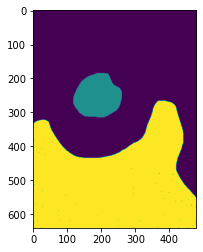

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


  8%|▊         | 1/12 [00:12<02:15, 12.36s/it]

/work/users/mi186veva/data_bea/ColonData/CP5.mat


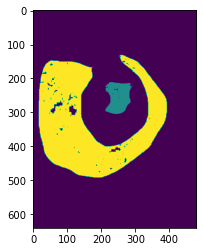

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 17%|█▋        | 2/12 [00:24<02:04, 12.50s/it]

/work/users/mi186veva/data_bea/ColonData/CP2.mat


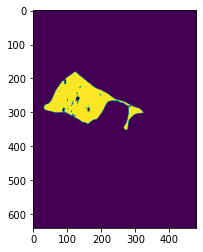

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 25%|██▌       | 3/12 [00:37<01:52, 12.47s/it]

/work/users/mi186veva/data_bea/ColonData/CP11.mat


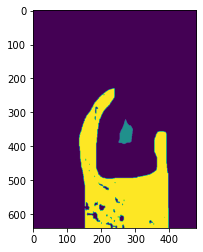

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 33%|███▎      | 4/12 [00:50<01:40, 12.61s/it]

/work/users/mi186veva/data_bea/ColonData/CP3.mat


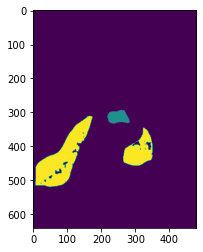

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 42%|████▏     | 5/12 [01:02<01:28, 12.59s/it]

/work/users/mi186veva/data_bea/ColonData/CP4.mat


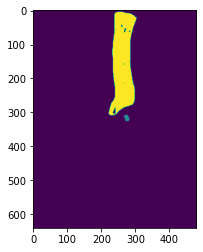

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 50%|█████     | 6/12 [01:16<01:16, 12.81s/it]

/work/users/mi186veva/data_bea/ColonData/CP7.mat


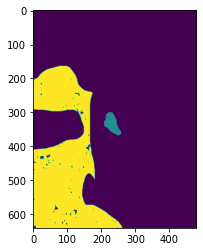

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 58%|█████▊    | 7/12 [01:29<01:05, 13.16s/it]

/work/users/mi186veva/data_bea/ColonData/CP9.mat


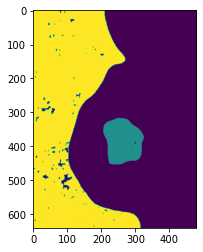

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 67%|██████▋   | 8/12 [01:43<00:53, 13.35s/it]

/work/users/mi186veva/data_bea/ColonData/CP12.mat


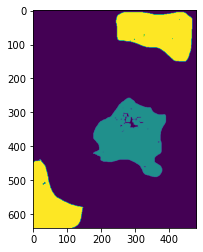

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 75%|███████▌  | 9/12 [01:57<00:40, 13.49s/it]

/work/users/mi186veva/data_bea/ColonData/CP8.mat


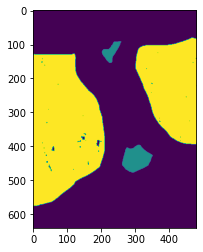

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 83%|████████▎ | 10/12 [02:11<00:27, 13.61s/it]

/work/users/mi186veva/data_bea/ColonData/CP1.mat


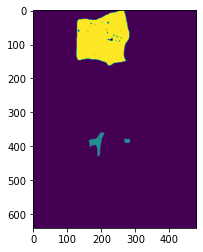

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


 92%|█████████▏| 11/12 [02:24<00:13, 13.56s/it]

/work/users/mi186veva/data_bea/ColonData/CP6.mat


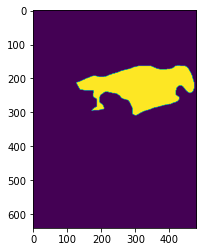

(640, 480, 81) (640, 480)
(640, 480, 5, 5, 81)


100%|██████████| 12/12 [02:38<00:00, 13.20s/it]


In [5]:
import scipy.io
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

preffix = '/work/users/mi186veva/data_bea/ColonData/'

mat_paths = glob.glob(os.path.join(preffix, '*.mat'))

save_folder = os.path.join(preffix, 'raw_3d_all_right_order')
if not os.path.exists(save_folder):
    os.mkdir(save_folder)

for mat_path in tqdm(mat_paths):
    print(mat_path)
    mat = scipy.io.loadmat(mat_path)
    spectrum, mask = mat['cube'], mat['gtMap']
    plt.imshow(mask)
    plt.show()
    print(spectrum.shape, mask.shape)
    spectrum = patches3d_get_from_spectrum(spectrum)
    print(spectrum.shape)
    spectrum = np.reshape(spectrum, (640 * 480, 5, 5, 81))
    mask = np.reshape(mask, (640* 480))
    
    
    name = mat_path.split('/')[-1].split('.')[0]
    
    np.savez(os.path.join(save_folder, name), X=spectrum, y=mask)
    

(307200, 1)


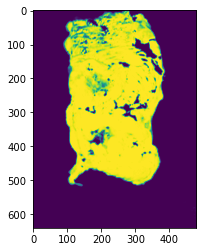

(307200, 1)


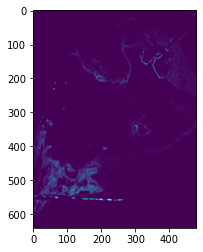

(307200, 1)


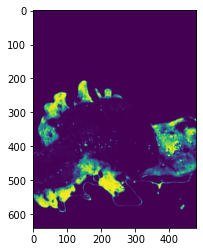

(307200, 1)


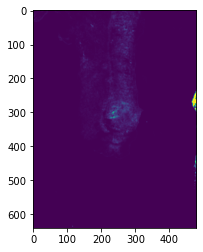

(307200, 1)


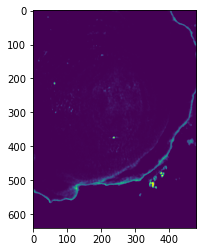

(307200, 1)


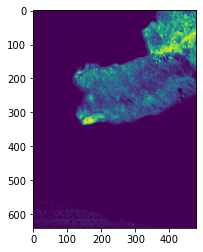

(307200, 1)


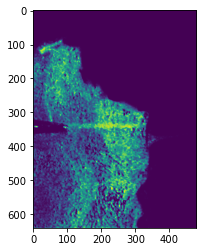

(307200, 1)


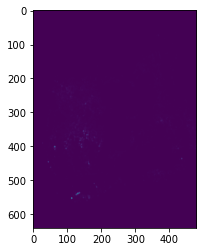

(307200, 1)


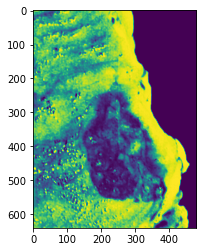

(307200, 1)


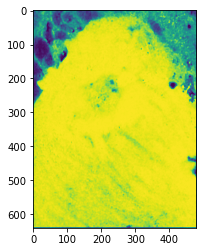

(307200, 1)


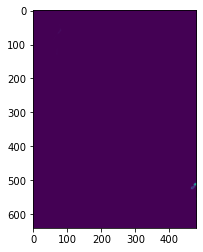

(307200, 1)


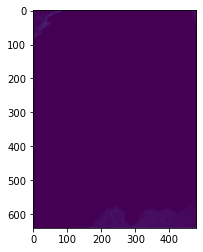

In [10]:
import matplotlib.pyplot as plt
predictions = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/CV_3d_bea_colon_sample_weights_1output_all_right_order/cp-0008/predictions_by_patient.npy',
                     allow_pickle=True)

for pred in predictions:
    pred = np.array(pred)
    print(pred.shape)
    #pred = np.argmax(pred, axis=1)
    #print(pred.shape)
    plt.imshow(np.reshape(pred, (640, 480)))
    plt.show()

In [6]:
original_paths = glob.glob('C:\\Users\\tkachenko\\Desktop\\HSI\\EsophagusDatabase\\hsi-experiments-bea\\bea\\*.npz')

data_original_npz = np.load(original_paths[0])
data_original_npz['y'].shape
y = data_original_npz['y']

In [10]:
print(np.where(y == 0))
print(np.where(y == 1))
print(np.where(y == 2))

(array([    0,     1,     2, ..., 27026, 27027, 27028], dtype=int64),)
(array([27029, 27030, 27031, ..., 35737, 35738, 35739], dtype=int64),)
(array([ 35740,  35741,  35742, ..., 307197, 307198, 307199], dtype=int64),)
